In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from scipy.stats import skew, kurtosis  # For calculating skewness and kurtosis
from scipy.stats import pearsonr  # For calculating Pearson correlation coefficient
from scipy.stats import pointbiserialr  # For calculating point-biserial correlation coefficient
from scipy.stats import f_oneway  # For performing ANOVA

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
sns.color_palette("muted")

/kaggle/input/black-friday-sales-eda/train.csv


[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [2]:
data = pd.read_csv('/kaggle/input/black-friday-sales-eda/train.csv')

# Data Preprocessing

In [3]:
data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
data.shape

(550068, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
# apply() method is used to perform a specific operation on all columns of the data.
# find no. of unique values in each column

data.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

In [7]:
# Describing only the specific important columns whose mean mode & median needs to be studied to comprehend the data.
data[['Stay_In_Current_City_Years','Product_Category_1','Product_Category_2','Product_Category_3','Purchase']].describe()

,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,376430.000000,166821.000000,550068.000000
mean,5.404270,9.842329,12.668243,9263.968713
std,3.936211,5.086590,4.125338,5023.065394
min,1.000000,2.000000,3.000000,12.000000
25%,1.000000,5.000000,9.000000,5823.000000
50%,5.000000,9.000000,14.000000,8047.000000
75%,8.000000,15.000000,16.000000,12054.000000
max,20.000000,18.000000,18.000000,23961.000000


In [8]:
# Renaming few columns for my convenience

data.rename(columns={'Stay_In_Current_City_Years' : 'Years_in_city','City_Category' : 'City'}, inplace=True)

data.head(8)

,User_ID,Product_ID,Gender,Age,Occupation,City,Years_in_city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854


In [9]:
data['Product_Category_2'].isnull().sum()

# (173638/550068)*100 = 31.56664

# Around 31.5% of product category 2 is missing. So initially we'll describe the data with respect to the age
# and see the spreadout of the values & fill the empty columns of each age category with the appropriate value.

173638

In [10]:
# Categorizing the age column

data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
data['Age'] = data['Age'].map({'0-17':'Child','18-25':'Teenager','26-35':'Adult','36-45':'Adult','46-50':'Adult','51-55':'Old','55+':'Old'})

# Age 0-17 categorized as Child
# Age 18-25 categorized as Teenager
# Age 26-49 categorized as Adult
# Age 50 & above categorized as Old

In [12]:
data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City,Years_in_city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,Child,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,Child,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,Child,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,Child,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,Old,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,Adult,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,Adult,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,Adult,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,Adult,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,Adult,20,A,1,1,8,NaN,NaN,7871


In [13]:
# Calculate the mode of the 'Product_Category_2' column for each age group in the DataFrame 'data'

a = data.groupby(['Age'])['Product_Category_2'].agg(pd.Series.mode)
a

Age
Adult       8.0
Child       4.0
Old         8.0
Teenager    8.0
Name: Product_Category_2, dtype: float64

In [14]:
# For child age category, filling product_category_2 with 4.0(mode)
child = data.loc[data['Age'] == 'Child','Product_Category_2'].fillna(a['Child'])
data.loc[data['Age'] == 'Child','Product_Category_2'] = child

# For Teenager, adult & old age category, filling product_category_2 with 8.0(mode)
adult = data.loc[data['Age'] == 'Adult','Product_Category_2'].fillna(a['Adult'])
data.loc[data['Age'] == 'Adult','Product_Category_2'] = adult

teenager = data.loc[data['Age'] == 'Teenager','Product_Category_2'].fillna(a['Teenager'])
data.loc[data['Age'] == 'Teenager','Product_Category_2'] = teenager

old = data.loc[data['Age'] == 'Old','Product_Category_2'].fillna(a['Old'])
data.loc[data['Age'] == 'Old','Product_Category_2'] = old

data['Product_Category_2']

0          4.0
1          6.0
2          4.0
3         14.0
4          8.0
          ... 
550063     8.0
550064     8.0
550065     8.0
550066     8.0
550067     8.0
Name: Product_Category_2, Length: 550068, dtype: float64

In [15]:
# Since more than 70% of data in Product_category_3 is missing, so I've decided to drop the column itself. 
# Also the product ID doesn't matter alot so I'll drop that too.
data.drop(columns=['Product_Category_3','Product_ID'], inplace = True)

In [16]:
data.duplicated().sum()

# There are 3782 duplicate rows in the table

3782

In [17]:
data.drop_duplicates(inplace=True)

In [18]:
# Convert categorical data into integer using map() method

# If male then represented by 0 & if female then 1

data['Gender'] = data['Gender'].map({'M':0,'F':1})

In [19]:
# find no. of unique values in each column
data.apply(lambda x: len(x.unique()))

User_ID                5891
Gender                    2
Age                       4
Occupation               21
City                      3
Years_in_city             5
Marital_Status            2
Product_Category_1       20
Product_Category_2       17
Purchase              18105
dtype: int64

# Data Visualization

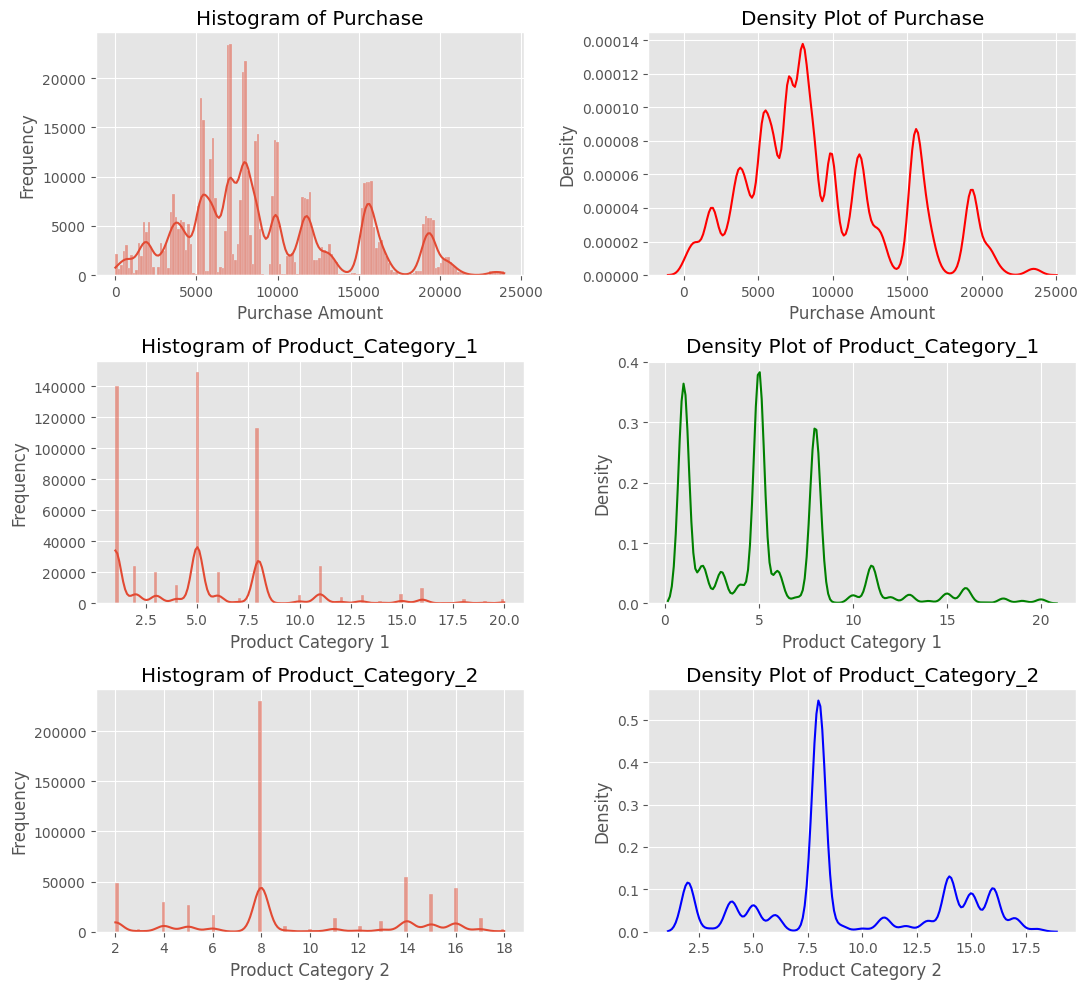

In [20]:
# We have used both histogram to study the frequency distribution of values & density plot is used to visualize 
# the smoothness & shape of the distribution.

# Set up the figure and axes for subplots
fig, axes = plt.subplots(3, 2, figsize=(11,10))  # 3 rows, 2 columns for each variable

# Plotting the histogram for 'Purchase', 'Product_Category_1', and 'Product_Category_2'
sns.histplot(data['Purchase'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Purchase')
axes[0, 0].set_xlabel('Purchase Amount')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(data['Product_Category_1'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Product_Category_1')
axes[1, 0].set_xlabel('Product Category 1')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(data['Product_Category_2'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Histogram of Product_Category_2')
axes[2, 0].set_xlabel('Product Category 2')
axes[2, 0].set_ylabel('Frequency')

# Plot density plots for 'Purchase', 'Product_Category_1', and 'Product_Category_2'
sns.kdeplot(data['Purchase'], ax=axes[0, 1], color='r')
axes[0, 1].set_title('Density Plot of Purchase')
axes[0, 1].set_xlabel('Purchase Amount')
axes[0, 1].set_ylabel('Density')

sns.kdeplot(data['Product_Category_1'], ax=axes[1, 1], color='g')
axes[1, 1].set_title('Density Plot of Product_Category_1')
axes[1, 1].set_xlabel('Product Category 1')
axes[1, 1].set_ylabel('Density')

sns.kdeplot(data['Product_Category_2'], ax=axes[2, 1], color='b')
axes[2, 1].set_title('Density Plot of Product_Category_2')
axes[2, 1].set_xlabel('Product Category 2')
axes[2, 1].set_ylabel('Density')

# Adjust layout to prevent overlap of titles and labels
plt.tight_layout()

* ##### From the above histogram & density plot of the purchase, we can deduce that the puchase amout is almost distributed & is mostly concentrated between 5000-10000.

* ##### From the above histogram & density plot of the product_category_1,there is multimodal distribution where multiple products from product_category_1 was frequently purchased.

* ##### From the above histogram & density plot of the product_category_2,there is unimodal distribution where product 8 from product_category_1 was frequently purchased & there is a kind of uniformity around let & right of the central peak. This suggests that data is almost evenly distributed around the peak.


Text(0.5, 1.0, 'Product_Category_2')

<Figure size 640x480 with 0 Axes>

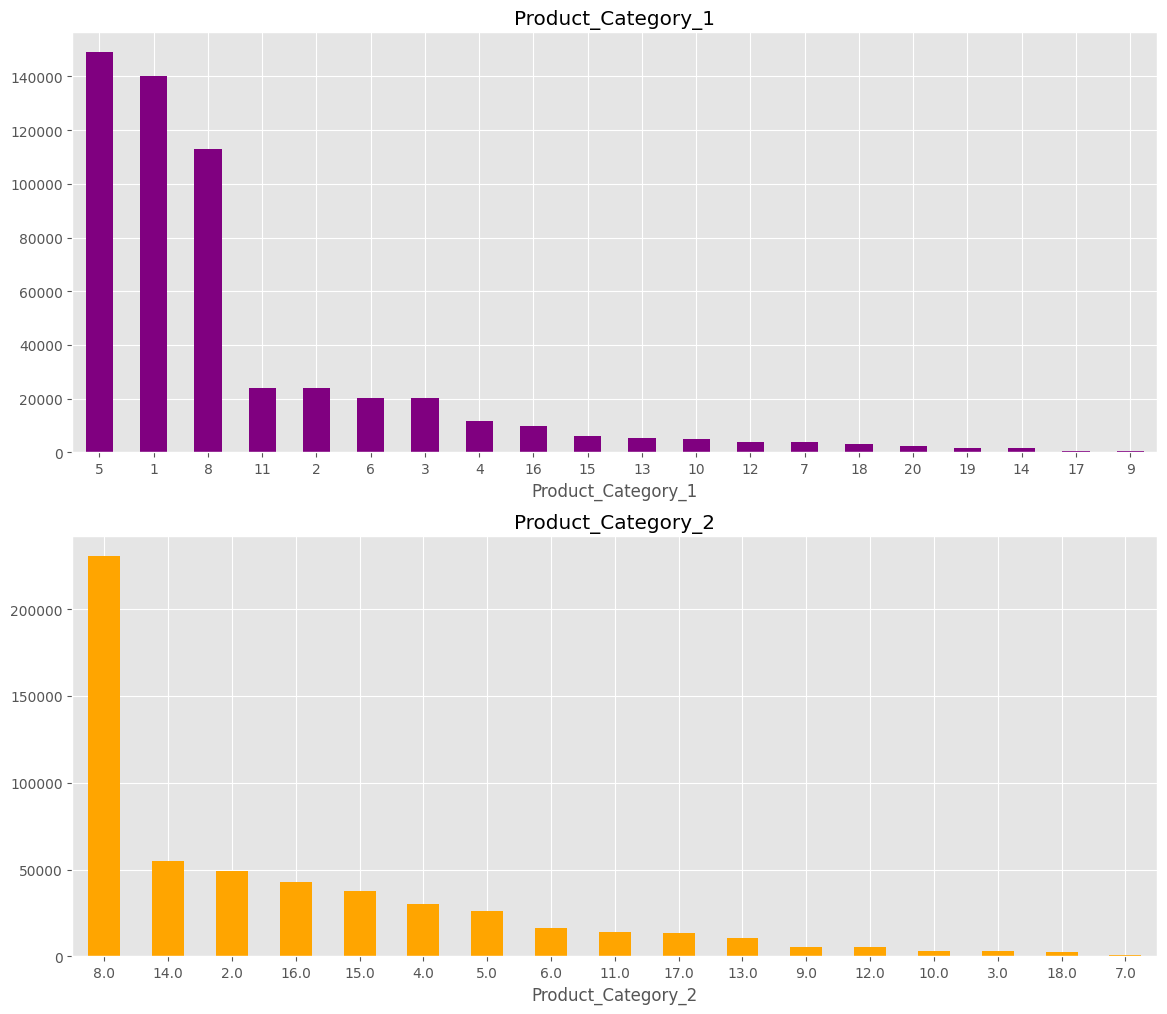

In [21]:
plt.figure(1)
plt.figure(figsize=(14,12))

# Column (Product_Category_1)
plt.subplot(211)
data['Product_Category_1'].value_counts().plot(kind='bar',color = 'purple',rot=0)
plt.title('Product_Category_1')

# Column (Product_Category_2)
plt.subplot(212)
data['Product_Category_2'].value_counts().plot(kind='bar',color = 'orange',rot=0)
plt.title('Product_Category_2')

##### From 1st visualization we can infer that product 5, 1 & 8 were highly sold.

##### From 2nd visualization we can infer that product 8 was highly sold.

<Figure size 640x480 with 0 Axes>

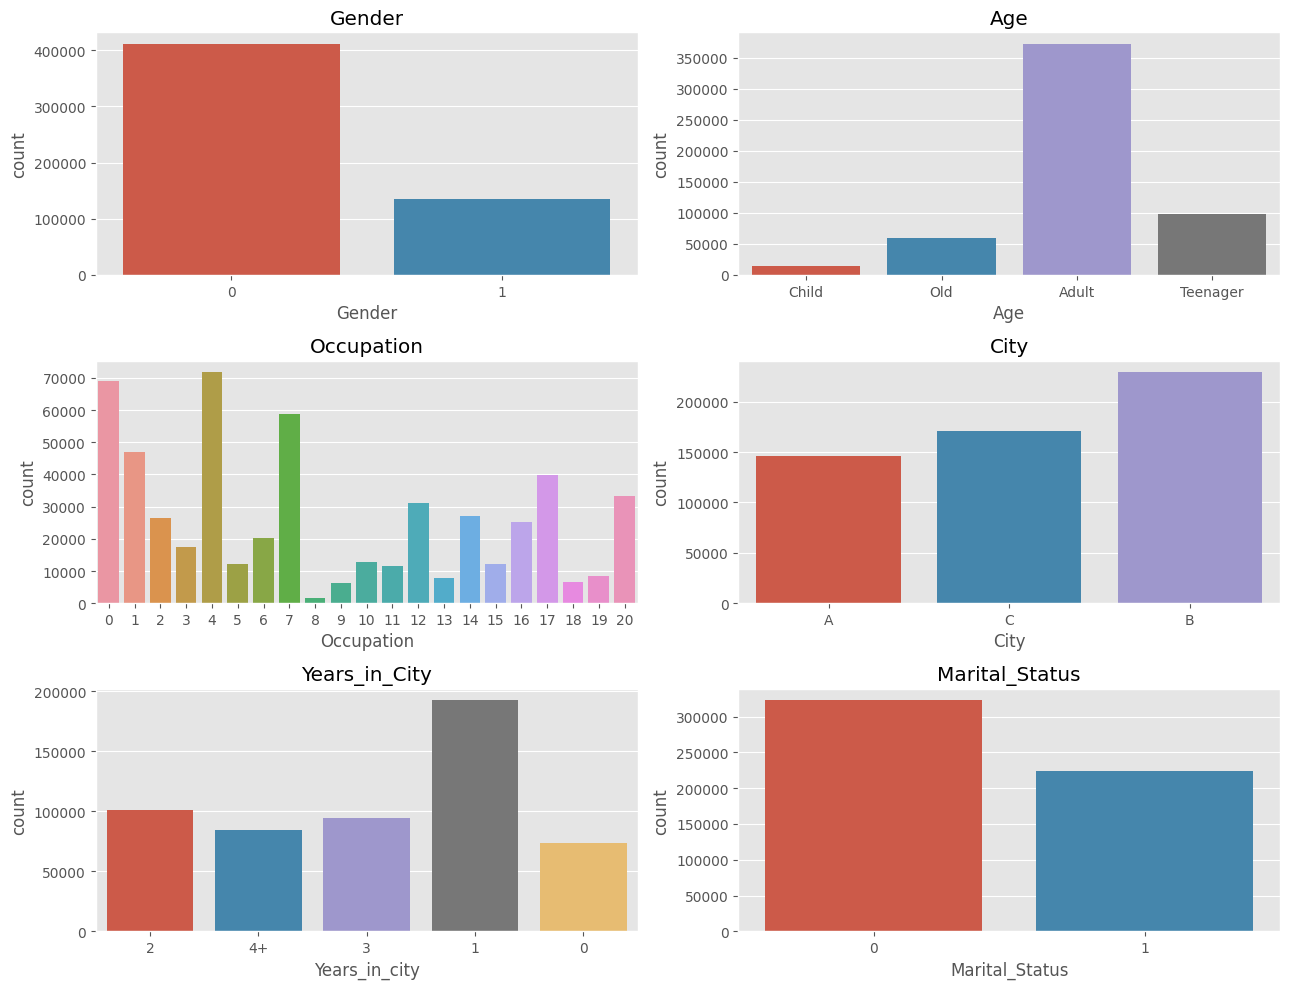

In [22]:
plt.figure(1)
plt.figure(figsize=(13,10))

# Column (Gender)
plt.subplot(321)
sns.countplot(data=data, x='Gender')
plt.title('Gender')

# Column (Age)
plt.subplot(322)
sns.countplot(data=data, x='Age')
plt.title('Age')

# Column (Occupation)
plt.subplot(323)
sns.countplot(data=data, x='Occupation')
plt.title('Occupation')

# Column (City)
plt.subplot(324)
sns.countplot(data=data, x='City')
plt.title('City')

# Column (Years_in_City)
plt.subplot(325)
sns.countplot(data=data, x='Years_in_city')
plt.title('Years_in_City')

# Column (Marital_Status)
plt.subplot(326)
sns.countplot(data=data, x='Marital_Status')
plt.title('Marital_Status')

plt.tight_layout()

* ##### We can observe that there are around 410k females almost 3.5x times more then males who buy the groceries.

* ##### Most of the customers are the adult in the age rage of 26-50, more than 350k followed by teenagers then child then oldies.

* ##### Most of the customers are the adult in the age rage of 26-50, more than 350k followed by teenagers then child then oldies.

* ##### Occupation 4, 0 & 7 customers are the highest while 8 customers are the least.

* ##### Most of the cutomers live in city B.

* ##### Most of te cutomers are residing in the city from the past 1 year.

* ##### Around 320k customers are married while around 230k customers are unmarried.

#### Categorical Column v/s Target Column

<Figure size 2000x3000 with 0 Axes>

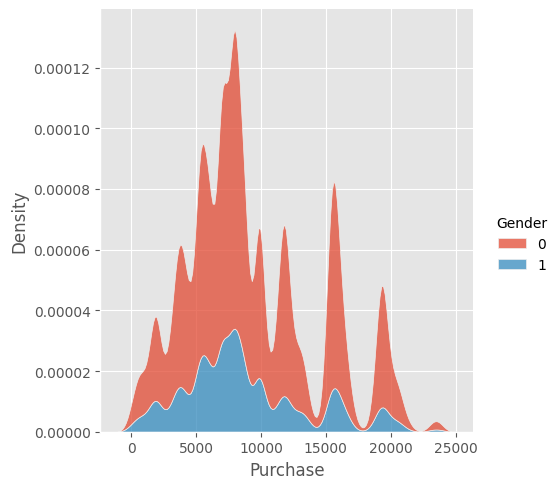

In [23]:
plt.figure(figsize = (20,30))
sns.displot(data=data, x="Purchase", hue="Gender", kind="kde", multiple="stack")

Text(0.5, 1.0, 'Product_Category_1 vs Purchase')

<Figure size 640x480 with 0 Axes>

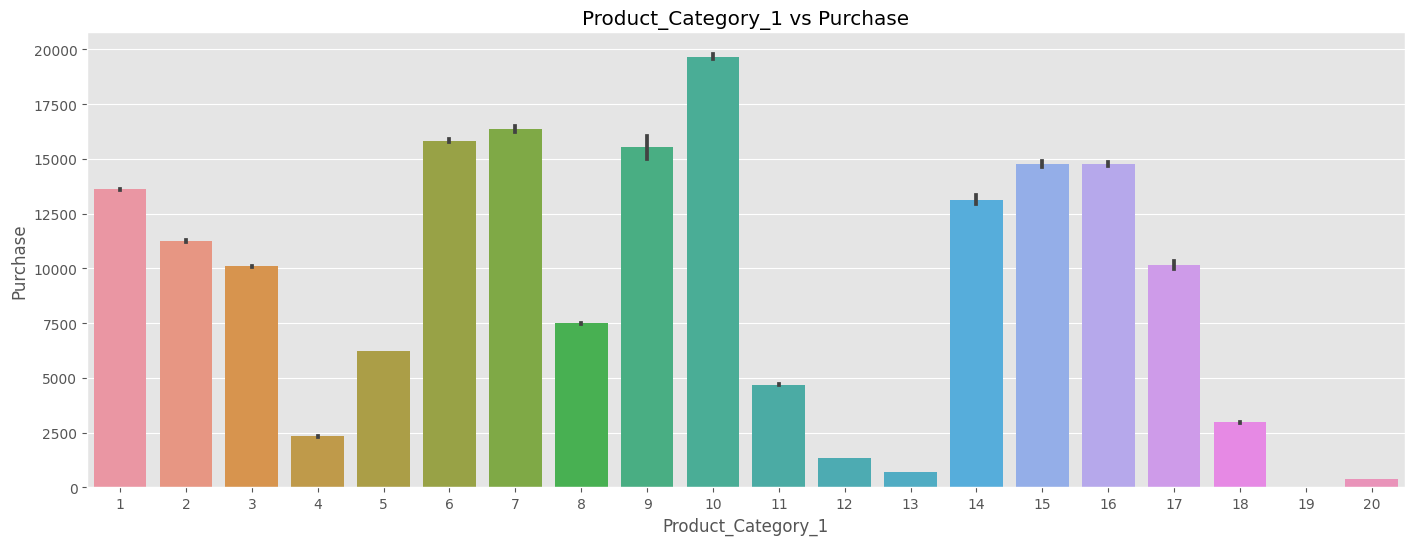

In [24]:
plt.figure(1)
plt.figure(figsize = (17, 13))

# Column (Product_Category_1 vs Purchase)
plt.subplot(211)
sns.barplot(x = data['Product_Category_1'], y = data['Purchase'])
plt.title('Product_Category_1 vs Purchase')

Text(0.5, 1.0, 'Product_Category_2 vs Purchase')

<Figure size 640x480 with 0 Axes>

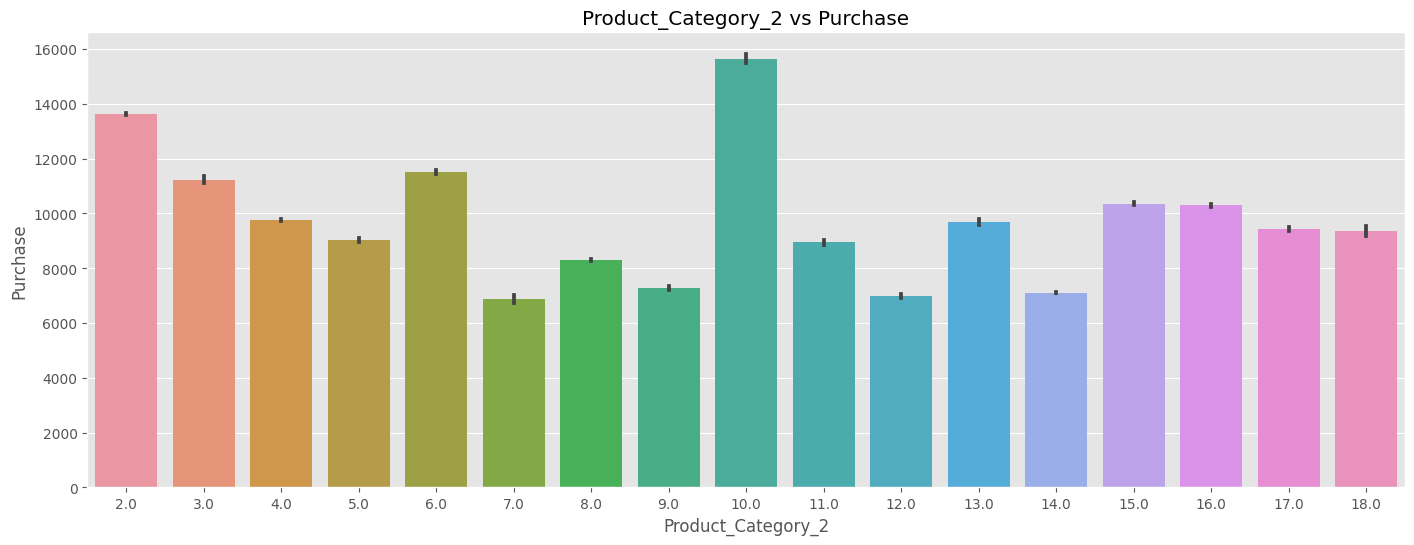

In [25]:
plt.figure(1)
plt.figure(figsize = (17, 13))

# Column (Product_Category_2 vs Purchase)
plt.subplot(212)
sns.barplot(x = data['Product_Category_2'], y = data['Purchase'])
plt.title('Product_Category_2 vs Purchase')

Text(0.5, 1.0, 'Marital status vs Purchase')

<Figure size 640x480 with 0 Axes>

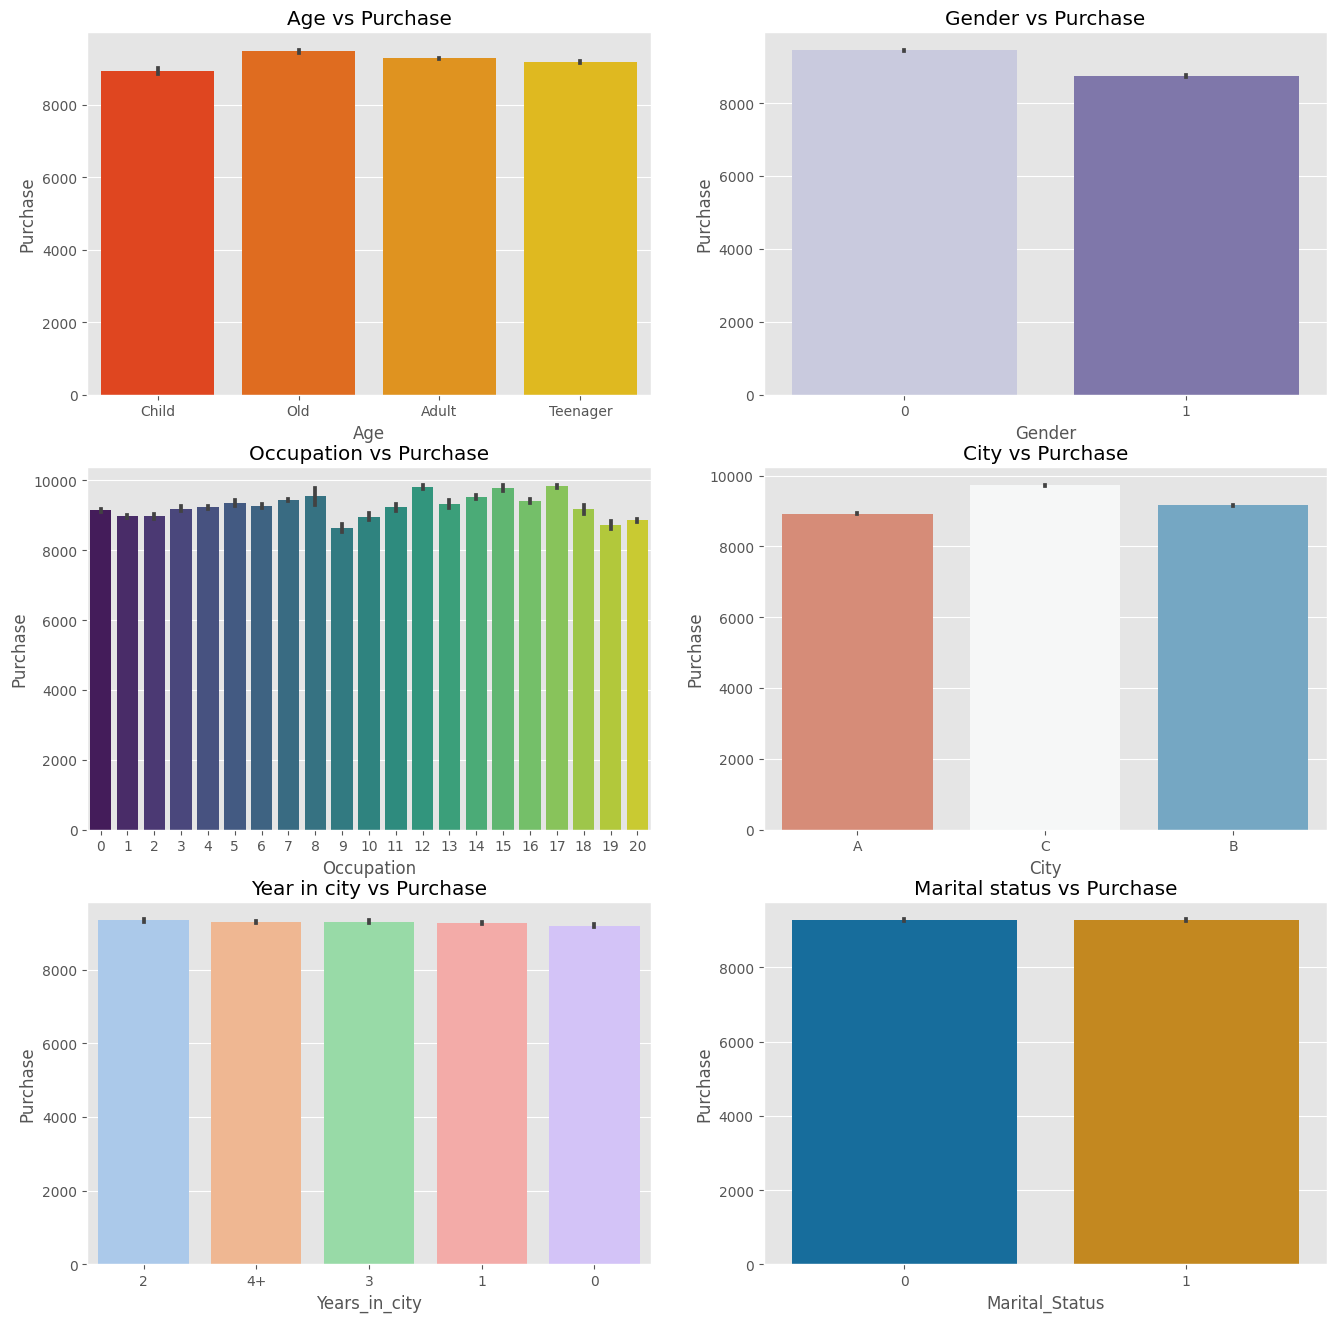

In [26]:
plt.figure(1)
plt.figure(figsize = (16, 16))

# Column (Age vs Purchase)
plt.subplot(321)
sns.barplot(x = data['Age'], y = data['Purchase'], palette="autumn")
plt.title('Age vs Purchase')

# Column (Gender vs Purchase)
plt.subplot(322)
sns.barplot(x = data['Gender'], y = data['Purchase'],palette="Purples")
plt.title('Gender vs Purchase')

# Column (Occupation vs Purchase)
plt.subplot(323)
sns.barplot(x = data['Occupation'], y = data['Purchase'], palette="viridis")
plt.title('Occupation vs Purchase')

# Column (City vs Purchase)
plt.subplot(324)
sns.barplot(x = data['City'], y = data['Purchase'], palette = 'RdBu')
plt.title('City vs Purchase')

# Column (Years in city vs Purchase)
plt.subplot(325)
sns.barplot(x = data['Years_in_city'], y = data['Purchase'], palette = 'pastel')
plt.title('Year in city vs Purchase')

# Column (Marital Status vs Purchase)
plt.subplot(326)
sns.barplot(x = data['Marital_Status'], y = data['Purchase'], palette = 'colorblind')
plt.title('Marital status vs Purchase')

<Axes: xlabel='Occupation', ylabel='Purchase'>

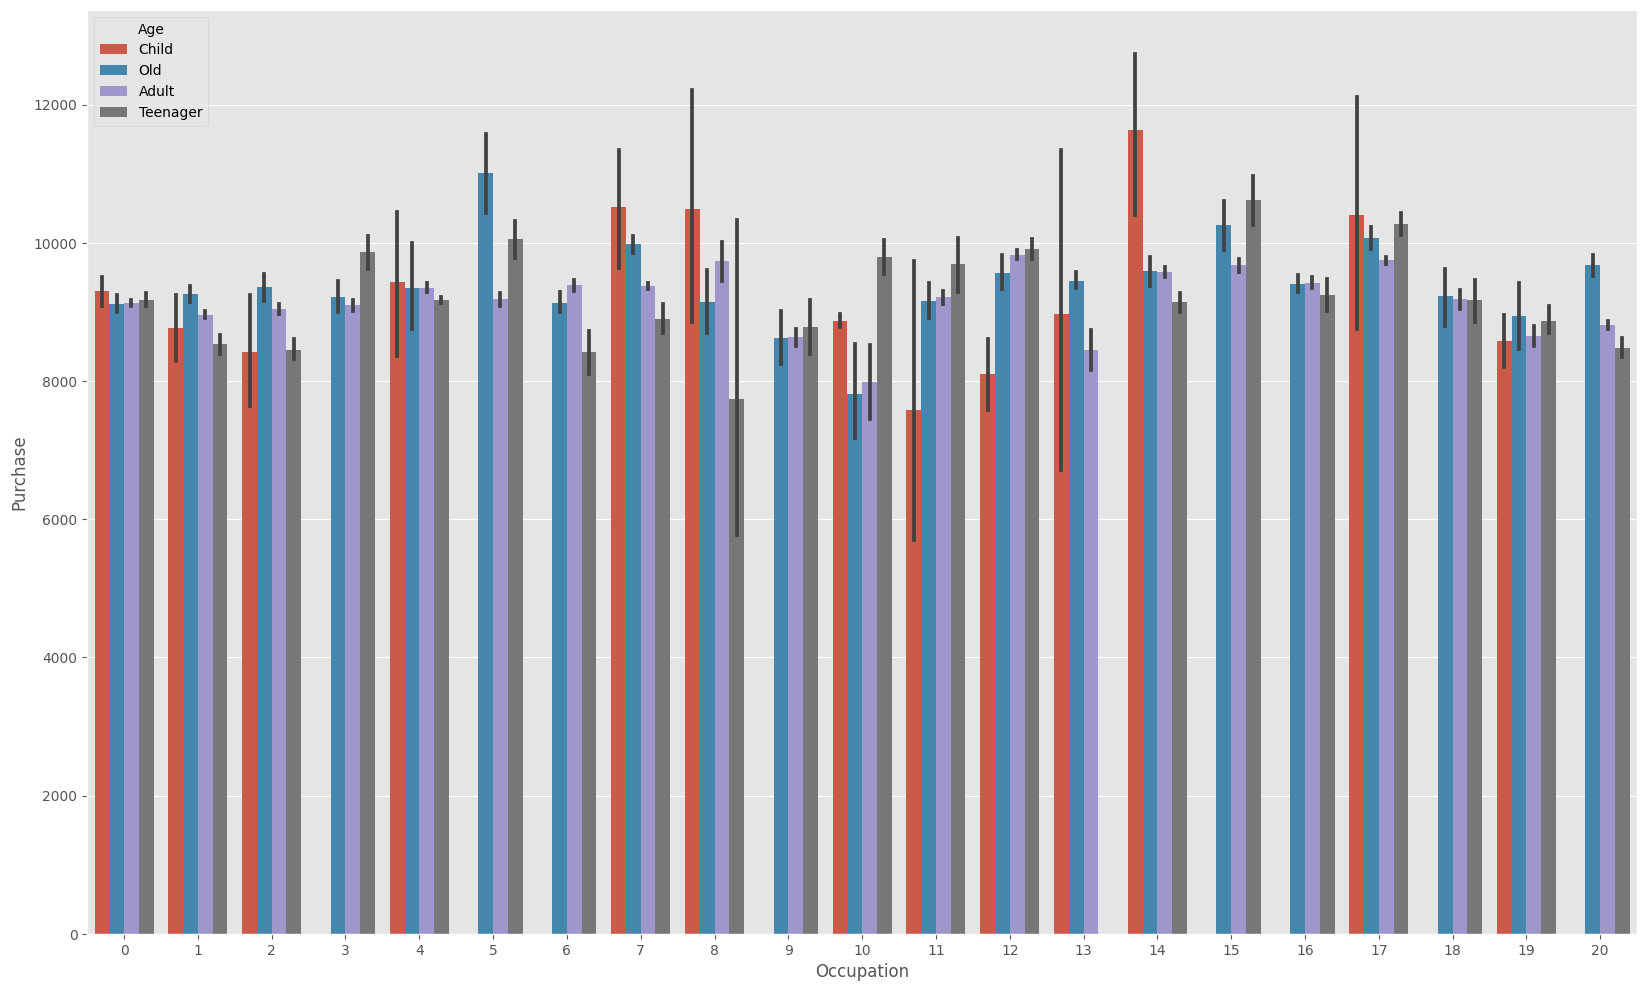

In [27]:
plt.figure(figsize = (20,12))
sns.barplot(data=data, hue = 'Age', x = 'Occupation', y = 'Purchase')

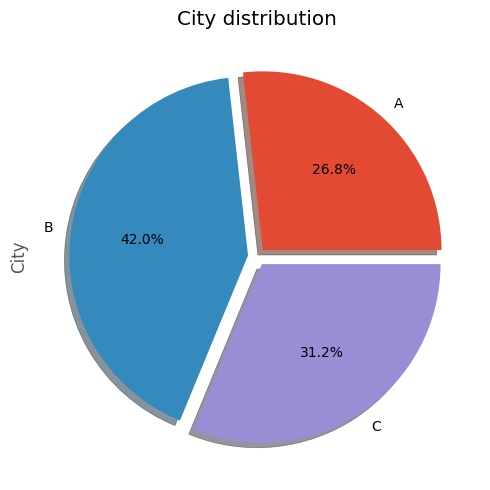

In [28]:
city = data.groupby('City')['City'].agg('count')
city.plot(subplots=True,kind='pie',figsize=(5,5), shadow=True, autopct='%.1f%%',explode = (0.05,0.05,0.05),)
plt.title('City distribution')
plt.tight_layout()

In [29]:
data['Age'] = data['Age'].map({'Child' : 0, 'Teenager' : 1, 'Adult' : 2, 'Old' : 3})

data['City'] = data['City'].map({'A' : 0, 'B' : 1, 'C' : 2})

<Axes: >

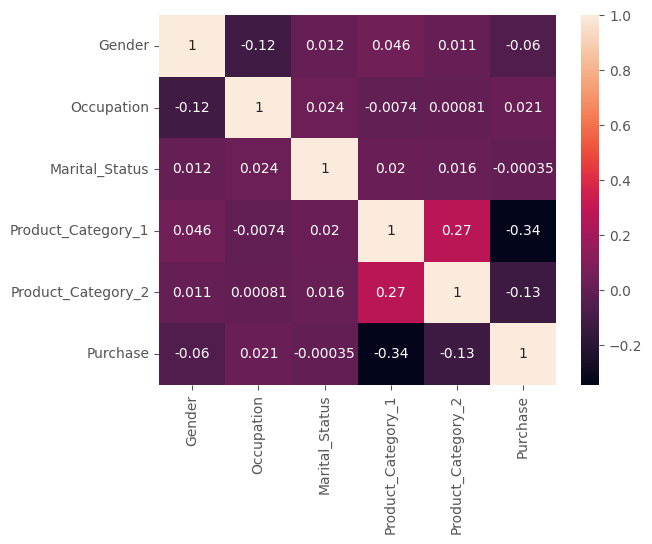

In [30]:
corr = data[['Gender','Occupation','Marital_Status','Product_Category_1','Product_Category_2','Purchase']].corr()
sns.heatmap(corr, annot=True)

##### Cmap is not helping since most of the relationships between the variables are non-linear & so it is becoming difficult to interpret the relations.

# Thankyou for reading the dataset. 

### PLEASE VOTE IF U FIND IT USEFUL🙏🏻😇